*Aveen Hussein*

# Step1: Importing data
 The dataset consists of mobile features and we aim to estimate a mobile price depending on them.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
# Reading our csv data
combine_data= pd.read_csv('/content/drive/MyDrive/Machine Learning/train.csv')
print (combine_data.head(5))
# null value
print (combine_data.isnull().sum())

print (combine_data.isnull().sum())
# max min mean for each col.....
print(combine_data.describe())


   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


now we can take note that the number of null values was 0 for every feature in this dataset but it doesn't mean that there doesn't exist any missing data which is just represented differently and that is what we will investigate in the Missing data section



# Step2: Basic cleaning

In [4]:
from sklearn.feature_extraction import DictVectorizer
# Importing the SimpleImputer class
from sklearn.impute import SimpleImputer

In [5]:
combine_data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

We see that all the data is int64 except for m_dep and m_cores, which is good as we can see that there are no mixed letters and number values so "" was not used to represent nan values for instance

**handeling data types**

Id3 algorithm works best with numeric data, and luckily in our case all the data is already numeric. 
**a brief on how splits are made for numeric data according to the internet**

Every split in a decision tree is based on a feature. If the feature is categorical, the split is done with the elements belonging to a particular class. If the feature is contiuous, the split is done with the elements higher than a threshold. At every split, the decision tree will take the best variable at that moment. This will be done according to an impurity measure with the splitted branches. And the fact that the variable used to do split is categorical or continuous is irrelevant (in fact, decision trees categorize contiuous variables by creating binary regions with the threshold).
src: https://datascience.stackexchange.com/questions/32622/how-to-make-a-decision-tree-with-both-continuous-and-categorical-variables-in-th

#Step3: Missing data

Now we will try to find out if there's any data with zero values that indicate missing data (for instance a mobile with 0 for battary power is likely a case of missing data same goes for multiple columns such as sc_h and sc_w and n_cores and so on)

In [6]:
len(combine_data.loc[(combine_data['battery_power']==0) | (combine_data['clock_speed']==0)|(combine_data['int_memory']==0)|
                    (combine_data['m_dep']==0)|(combine_data['mobile_wt']==0)|(combine_data['px_height']==0)|
                    (combine_data['px_height']==0)|(combine_data['px_width']==0)|(combine_data['ram']==0)|
                    ( combine_data['sc_h']==0)|(combine_data['sc_w']==0)|(combine_data['talk_time']==0)])

181

In [7]:
len(combine_data)

2000

so 181 out of 2000 fields has what we can assume is missing values

Now we will remove the rows that do have missing data 

In [8]:
combine_data_no_0=combine_data.loc[(combine_data['battery_power']!=0) & (combine_data['clock_speed']!=0)&(combine_data['int_memory']!=0)&
                    (combine_data['m_dep']!=0)&(combine_data['mobile_wt']!=0)&(combine_data['px_height']!=0)&
                    (combine_data['px_height']!=0)&(combine_data['px_width']!=0)&(combine_data['ram']!=0)&
                    ( combine_data['sc_h']!=0)&(combine_data['sc_w']!=0)&(combine_data['talk_time']!=0)]

In [9]:
len(combine_data_no_0)

1819

In [10]:
imputer = SimpleImputer(missing_values=0,
                        strategy='mean')


In [11]:
data_to_impute=combine_data[['battery_power','clock_speed','int_memory','m_dep','mobile_wt','px_height','px_width','ram','sc_h','sc_w','talk_time']]

In [12]:
imputer = imputer.fit(data_to_impute)

data = imputer.transform(data_to_impute)

print("Imputed Data : \n", data)

Imputed Data : 
 [[8.420e+02 2.200e+00 7.000e+00 ... 9.000e+00 7.000e+00 1.900e+01]
 [1.021e+03 5.000e-01 5.300e+01 ... 1.700e+01 3.000e+00 7.000e+00]
 [5.630e+02 5.000e-01 4.100e+01 ... 1.100e+01 2.000e+00 9.000e+00]
 ...
 [1.911e+03 9.000e-01 3.600e+01 ... 9.000e+00 1.000e+00 5.000e+00]
 [1.512e+03 9.000e-01 4.600e+01 ... 1.800e+01 1.000e+01 1.900e+01]
 [5.100e+02 2.000e+00 4.500e+01 ... 1.900e+01 4.000e+00 2.000e+00]]


In [13]:
imputed=pd.DataFrame(data=data, columns=['battery_power','clock_speed','int_memory','m_dep','mobile_wt','px_height','px_width','ram','sc_h','sc_w','talk_time'])

In [14]:
imputed.describe()

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,32.046500,0.501750,140.249000,645.753754,1251.515500,2124.213000,12.306500,6.337363,11.011000
std,439.418206,0.816004,18.145715,0.288416,35.399655,443.310973,432.199447,1084.732044,4.213245,3.960716,5.463955
min,501.000000,0.500000,2.000000,0.100000,80.000000,1.000000,500.000000,256.000000,5.000000,1.000000,2.000000
25%,851.750000,0.700000,16.000000,0.200000,109.000000,284.000000,874.750000,1207.500000,9.000000,3.000000,6.000000
50%,1226.000000,1.500000,32.000000,0.500000,141.000000,568.000000,1247.000000,2146.500000,12.000000,6.000000,11.000000
75%,1615.250000,2.200000,48.000000,0.800000,170.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000
max,1998.000000,3.000000,64.000000,1.000000,200.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000


In [15]:
data_to_keep=combine_data.drop(['battery_power','clock_speed','int_memory','m_dep','mobile_wt','px_height','px_width','ram','sc_h','sc_w','talk_time'],axis=1)

In [16]:
All_data=pd.concat([imputed,data_to_keep],axis=1)

In [17]:
All_data.describe()

,battery_power,clock_speed,int_memory,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,...,blue,dual_sim,fc,four_g,n_cores,pc,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,32.046500,0.501750,140.249000,645.753754,1251.515500,2124.213000,12.306500,6.337363,...,0.4950,0.509500,4.309500,0.521500,4.520500,9.916500,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.816004,18.145715,0.288416,35.399655,443.310973,432.199447,1084.732044,4.213245,3.960716,...,0.5001,0.500035,4.341444,0.499662,2.287837,6.064315,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.500000,2.000000,0.100000,80.000000,1.000000,500.000000,256.000000,5.000000,1.000000,...,0.0000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.700000,16.000000,0.200000,109.000000,284.000000,874.750000,1207.500000,9.000000,3.000000,...,0.0000,0.000000,1.000000,0.000000,3.000000,5.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,1.500000,32.000000,0.500000,141.000000,568.000000,1247.000000,2146.500000,12.000000,6.000000,...,0.0000,1.000000,3.000000,1.000000,4.000000,10.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,2.200000,48.000000,0.800000,170.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,...,1.0000,1.000000,7.000000,1.000000,7.000000,15.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,3.000000,64.000000,1.000000,200.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,...,1.0000,1.000000,19.000000,1.000000,8.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [18]:
len(All_data.loc[(All_data['battery_power']==0) | (All_data['clock_speed']==0)|(All_data['int_memory']==0)|
                    (All_data['m_dep']==0)|(All_data['mobile_wt']==0)|(All_data['px_height']==0)|
                    (All_data['px_height']==0)|(All_data['px_width']==0)|(All_data['ram']==0)|
                    ( All_data['sc_h']==0)|(All_data['sc_w']==0)|(All_data['talk_time']==0)])

0

As we can see all the 0 values are successfully replaced with imputed values which are calculated using the mean of all the data in the same column

**as we can see there are no null values in the data, so there is no need to drop them**

# Step5: Data analysis

detecting outliers using IQR, model performance can be improved by handling noisy data.

In [19]:
def impute_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   upper = df[~(df>(q3+1.5*IQR))].max()
   lower = df[~(df<(q1-1.5*IQR))].min()
   indices=list(df.index[(df<lower)|(df>upper)])
   df = np.where(df > upper,
       df.mean(),
       np.where(
           
           df < lower,
           df.mean(),
           df
           )
       )
   print(indices)
   return df

In [20]:
columns =['battery_power','clock_speed','int_memory','m_dep','mobile_wt','px_height','px_height','px_width','ram','sc_h','sc_w','talk_time']
 
# Iterate over column names
for column in columns:
     
    All_data[column] = impute_outliers_IQR(All_data[column])

[]
[]
[]
[]
[]
[988, 1771]
[]
[]
[]
[]
[]
[]


In [21]:
# split data
X_train, X_test, y_train, y_test = train_test_split(
   All_data.iloc[:,:-1],
    All_data.iloc[:,-1],
    test_size=0.2,
    random_state=0)
# #size for test and train
print(X_train.shape)

print(X_test.shape)

(1600, 20)
(400, 20)


as to be expected, the corrolation between ram and mobile price appears to be the highest, followed by battary_power

some features may have useful meanings to add to the model when combined with other features, and since we only have 21 features to begin with then creating combinations of features should be computationally feasible

In [22]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
  # Get feature names
  combos = list(combinations(list(df.columns), 2))
  colnames = list(df.columns) + ['_'.join(x) for x in combos]

  # Find interactions
  poly = PolynomialFeatures(interaction_only=True, include_bias=False)
  df = poly.fit_transform(df)
  df = pd.DataFrame(df)
  df.columns = colnames

  # Remove interaction terms with all 0 values            
  noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
  df = df.drop(df.columns[noint_indicies], axis=1)

  return df
X=All_data.iloc[:,:-1]
X = add_interactions(X)
print(X.head())

   battery_power  clock_speed  int_memory  m_dep  mobile_wt  px_height  \
0          842.0          2.2         7.0    0.6      188.0       20.0   
1         1021.0          0.5        53.0    0.7      136.0      905.0   
2          563.0          0.5        41.0    0.9      145.0     1263.0   
3          615.0          2.5        10.0    0.8      131.0     1216.0   
4         1821.0          1.2        44.0    0.6      141.0     1208.0   

   px_width     ram  sc_h  sc_w  ...  n_cores_pc  n_cores_three_g  \
0     756.0  2549.0   9.0   7.0  ...         4.0              0.0   
1    1988.0  2631.0  17.0   3.0  ...        18.0              3.0   
2    1716.0  2603.0  11.0   2.0  ...        30.0              5.0   
3    1786.0  2769.0  16.0   8.0  ...        54.0              6.0   
4    1212.0  1411.0   8.0   2.0  ...        28.0              2.0   

   n_cores_touch_screen  n_cores_wifi  pc_three_g  pc_touch_screen  pc_wifi  \
0                   0.0           2.0         0.0            

In [23]:
# split data
X_trainselected, X_testselected, y_train, y_test = train_test_split(
   X,
    All_data.iloc[:,-1],
    test_size=0.2,
    random_state=0)
# #size for test and train
print(X_trainselected.shape)

print(X_testselected.shape)

(1600, 210)
(400, 210)


# Step6: Feature selection

Now we prepare the data for training
firstly, by splitting it into training and testing sets

we will go for a simple method of selecting the k-best features

In [24]:
import sklearn.feature_selection
# Create and fit selector
selector = sklearn.feature_selection.SelectKBest( k=20)
selected_features=selector.fit(X_trainselected, y_train)
# Get columns to keep and create new dataframe with those only
cols_indices = selected_features.get_support(indices=True)

cols_selected=[X.columns[i] for i in cols_indices]
X_trainselected=X_trainselected[cols_selected]
X_testselected=X_testselected[cols_selected]


In [25]:
print(cols_selected)

['ram', 'battery_power_ram', 'clock_speed_ram', 'int_memory_ram', 'm_dep_ram', 'mobile_wt_ram', 'px_height_ram', 'px_width_ram', 'ram_sc_h', 'ram_sc_w', 'ram_talk_time', 'ram_blue', 'ram_dual_sim', 'ram_fc', 'ram_four_g', 'ram_n_cores', 'ram_pc', 'ram_three_g', 'ram_touch_screen', 'ram_wifi']


# Building SVM model

*with unprocessed data*

In [26]:
import random
from sklearn import svm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [27]:

model = svm.SVC(kernel='poly', degree=2)
model.fit(X_train, y_train)


SVC(degree=2, kernel='poly')

In [28]:
prediction=model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


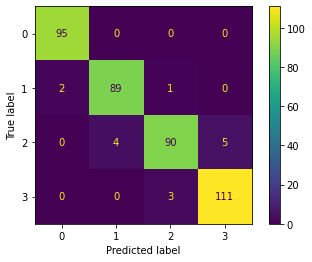

In [29]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix

plot_confusion_matrix(model,X_test,y_test)

In [30]:
from sklearn.metrics import f1_score
f1score=f1_score(y_test,prediction, average='weighted')
print(f1score)

0.9622393110297445


*for processed data*

In [31]:

model1 = svm.SVC(kernel='poly', degree=2)
model1.fit(X_trainselected, y_train)


SVC(degree=2, kernel='poly')

In [32]:
prediction1=model1.predict(X_testselected)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


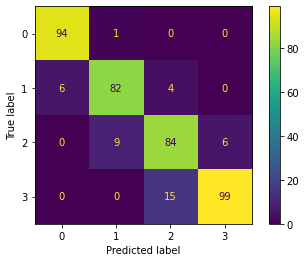

In [33]:
plot_confusion_matrix(model1,X_testselected,y_test)

In [34]:
f1score=f1_score(y_test,prediction1, average='weighted')
print(f1score)

0.8974871760094872


The results we got from this model are already good in terms of f1score and confusion, and this might be a consequence of a variety of factors such as:


*   The kernal we chose
*   The kernal specific parameters
*   The feature preprossecing that was made

and we will try to tune for the different factors to better understand the results



# Hyperparameter tuning, and model evaluation

*for unprocessed data*

In [35]:

from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'kernel': ['rbf','sigmoid','poly']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True,scoring='f1_weighted', verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ........................kernel=rbf;, score=0.934 total time=   0.1s
[CV 2/5] END ........................kernel=rbf;, score=0.947 total time=   0.1s
[CV 3/5] END ........................kernel=rbf;, score=0.944 total time=   0.1s
[CV 4/5] END ........................kernel=rbf;, score=0.950 total time=   0.1s
[CV 5/5] END ........................kernel=rbf;, score=0.953 total time=   0.1s
[CV 1/5] END ....................kernel=sigmoid;, score=0.207 total time=   0.2s
[CV 2/5] END ....................kernel=sigmoid;, score=0.182 total time=   0.2s
[CV 3/5] END ....................kernel=sigmoid;, score=0.211 total time=   0.2s
[CV 4/5] END ....................kernel=sigmoid;, score=0.188 total time=   0.2s
[CV 5/5] END ....................kernel=sigmoid;, score=0.184 total time=   0.2s
[CV 1/5] END .......................kernel=poly;, score=0.931 total time=   0.0s
[CV 2/5] END .......................kernel=poly;,

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['rbf', 'sigmoid', 'poly']},
             scoring='f1_weighted', verbose=3)

In [36]:
param_grid = {'kernel': ['poly'],'gamma': [1,0.1,0.01],'degree':[1,2,3,4]} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True,scoring='f1_weighted', verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....degree=1, gamma=1, kernel=poly;, score=0.972 total time=   6.2s
[CV 2/5] END ....degree=1, gamma=1, kernel=poly;, score=0.962 total time=  10.1s
[CV 3/5] END ....degree=1, gamma=1, kernel=poly;, score=0.953 total time=   3.8s
[CV 4/5] END ....degree=1, gamma=1, kernel=poly;, score=0.978 total time=   5.5s
[CV 5/5] END ....degree=1, gamma=1, kernel=poly;, score=0.969 total time=   4.4s
[CV 1/5] END ..degree=1, gamma=0.1, kernel=poly;, score=0.972 total time=   1.6s
[CV 2/5] END ..degree=1, gamma=0.1, kernel=poly;, score=0.962 total time=   2.0s
[CV 3/5] END ..degree=1, gamma=0.1, kernel=poly;, score=0.963 total time=   1.0s
[CV 4/5] END ..degree=1, gamma=0.1, kernel=poly;, score=0.975 total time=   2.1s
[CV 5/5] END ..degree=1, gamma=0.1, kernel=poly;, score=0.969 total time=   1.6s
[CV 1/5] END .degree=1, gamma=0.01, kernel=poly;, score=0.966 total time=   0.2s
[CV 2/5] END .degree=1, gamma=0.01, kernel=poly;

GridSearchCV(estimator=SVC(),
             param_grid={'degree': [1, 2, 3, 4], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['poly']},
             scoring='f1_weighted', verbose=3)

In [37]:
print(grid.best_params_)

{'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}


*for processed data*

In [38]:

param_grid = {'kernel': ['rbf','sigmoid','poly']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True,scoring='f1_weighted', verbose = 3)
  
# fitting the model for grid search
grid.fit(X_trainselected, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ........................kernel=rbf;, score=0.874 total time=   0.1s
[CV 2/5] END ........................kernel=rbf;, score=0.871 total time=   0.1s
[CV 3/5] END ........................kernel=rbf;, score=0.871 total time=   0.1s
[CV 4/5] END ........................kernel=rbf;, score=0.854 total time=   0.1s
[CV 5/5] END ........................kernel=rbf;, score=0.865 total time=   0.1s
[CV 1/5] END ....................kernel=sigmoid;, score=0.269 total time=   0.1s
[CV 2/5] END ....................kernel=sigmoid;, score=0.261 total time=   0.1s
[CV 3/5] END ....................kernel=sigmoid;, score=0.271 total time=   0.1s
[CV 4/5] END ....................kernel=sigmoid;, score=0.248 total time=   0.2s
[CV 5/5] END ....................kernel=sigmoid;, score=0.254 total time=   0.2s
[CV 1/5] END .......................kernel=poly;, score=0.851 total time=   0.0s
[CV 2/5] END .......................kernel=poly;,

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['rbf', 'sigmoid', 'poly']},
             scoring='f1_weighted', verbose=3)

In [39]:
print(grid.best_params_)


{'kernel': 'rbf'}


The previous tuning suggests that the best kernal for this data is indeed polynomial , rbf is a close second.
 more notably that the sigmoid kernal is not suitable for this data

In [65]:

param_grid = {'C': [0.1,0.01,0.001,1,0.0001], 'gamma' :  ["scale","auto"]}
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, refit = True,scoring='f1_weighted', verbose = 3)

grid_search.fit(X_trainselected, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ................C=0.1, gamma=scale;, score=0.884 total time=   0.1s
[CV 2/5] END ................C=0.1, gamma=scale;, score=0.881 total time=   0.1s
[CV 3/5] END ................C=0.1, gamma=scale;, score=0.884 total time=   0.1s
[CV 4/5] END ................C=0.1, gamma=scale;, score=0.839 total time=   0.1s
[CV 5/5] END ................C=0.1, gamma=scale;, score=0.859 total time=   0.1s
[CV 1/5] END .................C=0.1, gamma=auto;, score=0.105 total time=   0.2s
[CV 2/5] END .................C=0.1, gamma=auto;, score=0.105 total time=   0.2s
[CV 3/5] END .................C=0.1, gamma=auto;, score=0.105 total time=   0.2s
[CV 4/5] END .................C=0.1, gamma=auto;, score=0.102 total time=   0.2s
[CV 5/5] END .................C=0.1, gamma=auto;, score=0.102 total time=   0.2s
[CV 1/5] END ...............C=0.01, gamma=scale;, score=0.756 total time=   0.2s
[CV 2/5] END ...............C=0.01, gamma=scale;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.01, 0.001, 1, 0.0001],
                         'gamma': ['scale', 'auto']},
             scoring='f1_weighted', verbose=3)

In [66]:
print(grid_search.best_params_)

{'C': 0.1, 'gamma': 'scale'}


*scaled features*

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_std = scaler.transform(X_train)
X_stsd= scaler.transform(X_test)

In [72]:
param_grid = {'kernel': ['rbf','sigmoid','poly']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True,scoring='f1_weighted', verbose = 3)
  
# fitting the model for grid search
grid.fit(X_std, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ........................kernel=rbf;, score=0.903 total time=   0.2s
[CV 2/5] END ........................kernel=rbf;, score=0.837 total time=   0.3s
[CV 3/5] END ........................kernel=rbf;, score=0.853 total time=   0.2s
[CV 4/5] END ........................kernel=rbf;, score=0.854 total time=   0.2s
[CV 5/5] END ........................kernel=rbf;, score=0.897 total time=   0.1s
[CV 1/5] END ....................kernel=sigmoid;, score=0.937 total time=   0.1s
[CV 2/5] END ....................kernel=sigmoid;, score=0.935 total time=   0.1s
[CV 3/5] END ....................kernel=sigmoid;, score=0.906 total time=   0.1s
[CV 4/5] END ....................kernel=sigmoid;, score=0.897 total time=   0.1s
[CV 5/5] END ....................kernel=sigmoid;, score=0.931 total time=   0.1s
[CV 1/5] END .......................kernel=poly;, score=0.764 total time=   0.1s
[CV 2/5] END .......................kernel=poly;,

GridSearchCV(estimator=SVC(), param_grid={'kernel': ['rbf', 'sigmoid', 'poly']},
             scoring='f1_weighted', verbose=3)

In [73]:
print(grid.best_params_)

{'kernel': 'sigmoid'}


In [74]:
param_grid = {'kernel': ['sigmoid'],'gamma': [1,0.1,0.01],'C':[1,2,3,4]} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True,scoring='f1_weighted', verbose = 3)
  
# fitting the model for grid search
grid.fit(X_std, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.606 total time=   0.1s
[CV 2/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.644 total time=   0.1s
[CV 3/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.642 total time=   0.1s
[CV 4/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.669 total time=   0.1s
[CV 5/5] END ......C=1, gamma=1, kernel=sigmoid;, score=0.639 total time=   0.1s
[CV 1/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.847 total time=   0.1s
[CV 2/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.830 total time=   0.1s
[CV 3/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.851 total time=   0.1s
[CV 4/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.818 total time=   0.1s
[CV 5/5] END ....C=1, gamma=0.1, kernel=sigmoid;, score=0.858 total time=   0.1s
[CV 1/5] END ...C=1, gamma=0.01, kernel=sigmoid;, score=0.919 total time=   0.1s
[CV 2/5] END ...C=1, gamma=0.01, kernel=sigmoid;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['sigmoid']},
             scoring='f1_weighted', verbose=3)

In [75]:
print(grid.best_params_)

{'C': 4, 'gamma': 0.01, 'kernel': 'sigmoid'}


# Build and Evaluate the tuned SVM

*for unprocessed data*

In [45]:

model1 = svm.SVC(kernel='poly', gamma=0.01,degree=1)
model1.fit(X_train, y_train)

SVC(degree=1, gamma=0.01, kernel='poly')

In [46]:
prediction1=model1.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


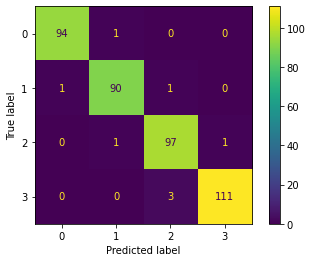

In [47]:
plot_confusion_matrix(model1,X_test,y_test)

In [48]:
f1score=f1_score(y_test,prediction1, average='weighted')
print(f1score)

0.9800307522123894


In [67]:

model2 = svm.SVC(kernel='rbf',gamma="scale",C=0.1)
model2.fit(X_trainselected, y_train)

SVC(C=0.1)

In [68]:
prediction2=model2.predict(X_testselected)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


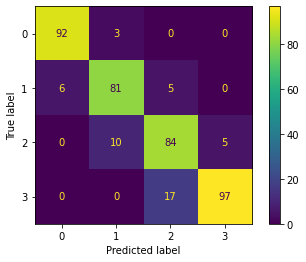

In [69]:
plot_confusion_matrix(model2,X_testselected,y_test)

In [70]:
f1score=f1_score(y_test,prediction2, average='weighted')
print(f1score)

0.8855489416263876


*for scaled data*

In [76]:

model3 = svm.SVC(kernel='sigmoid', gamma=0.01,C=4)
model3.fit(X_std, y_train)

SVC(C=4, gamma=0.01, kernel='sigmoid')

In [78]:
prediction3=model3.predict(X_stsd)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


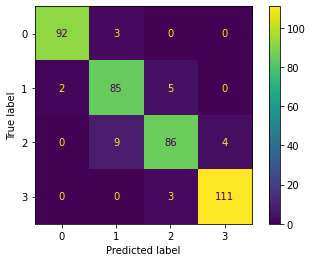

In [80]:
plot_confusion_matrix(model3,X_stsd,y_test)

In [81]:
f1score=f1_score(y_test,prediction3, average='weighted')
print(f1score)

0.9349533958887535


# Descussing the results

The model generally performed better after hyperparamter tuning which is to be expected. The unexpected thing was that the data which was processed by finding combinations of two features and selecting k best didn't perform as well as the model with all of the original features and this can be explained by the fact that svm algorithim already works by finding relations between sets of features and eliminating the original features and replacing them with combinations of 2 while it worked for ID3 (which doesn't process how features relate to each other and needs such a preprocessing ) will only be eliminating valid combinations that svm can detect. The fact that linear svm performed so well further validates the assumption that in this dataset the combination of several features has more to tell us about the price range of a mobile than the  individual features.